# <div style="background-color: lightgreen; padding: 10px;"><font color='green'><center>PRODIGY_DS_03</center></font></div>

## <font color='green'><center>Task 3.To build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data.</center></font>

### <font color='green'> INTRODUCTION :</font>
#### A Decision Tree algorithm is one of the most popular machine learning algorithms. It uses a tree like structure and their possible combinations to solve a particular problem. It belongs to the class of supervised learning algorithms where it can be used for both classification and regression purposes.
#### A decision tree is a structure that includes a root node, branches, and leaf nodes. Each internal node denotes a test on an attribute, each branch denotes the outcome of a test, and each leaf node holds a class label. The topmost node in the tree is the root node.
#### We make some assumptions while implementing the Decision-Tree algorithm. These are listed below:-
 #### 1 At the beginning, the whole training set is considered as the root.
 #### 2 Feature values need to be categorical. If the values are continuous then they are discretized prior to building the model.
 #### 3 Records are distributed recursively on the basis of attribute values.
 #### 4 Order to placing attributes as root or internal node of the tree is done by using some statistical approach.
 


### <font color='green'>DATA DESCRIPTION :</font>
#### The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

### <font color='green'>Loading Data Set :</font>

In [57]:
#pip install ucimlrepo
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
bank_marketing = fetch_ucirepo(id=222) 
   
# data (as pandas dataframes) 
X = bank_marketing.data.features 
y = bank_marketing.data.targets 
  
# metadata 
print(bank_marketing.metadata) 
  
# variable information 
print(bank_marketing.variables) 


{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

### <font color='green'>Import Libraries :</font>

In [61]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

### <font color='green'>Understanding and Describing Data Set :</font>

In [63]:
Banking_data = X.copy()
Banking_data['y'] = y
Banking_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [65]:
Banking_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
 16  y            45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [66]:
Banking_data.describe()

,age,balance,day_of_week,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### <font color='green'>Frequency distribution of values in variables</font>

In [67]:
col_names = Banking_data.columns


for col in col_names:
    
    print(df[col].value_counts()) 

age
32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
93       2
90       2
95       2
88       2
94       1
Name: count, Length: 77, dtype: int64
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
Name: count, dtype: int64
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
education
secondary    23202
tertiary     13301
primary       6851
Name: count, dtype: int64
default
no     44396
yes      815
Name: count, dtype: int64
balance
 0        3514
 1         195
 2         156
 4         139
 3         134
          ... 
-381         1
 4617        1
 20584       1
 4358        1
 16353       1
Name: count, Length: 7168, dtype: int64
housing
yes    25130
no     20081
Name: count, dtype: int64
loan
no     37967
yes     7244
Name: count, dtype: 

### <font color='green'>This is our target variable </font>

In [68]:
Banking_data['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

### <font color='green'> We will drop rows with missing target variables</font>

In [70]:
Banking_data= Banking_data.dropna(subset=['y'])
Banking_data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


### <font color='green'> We will Encode the target variable 'y'</font>

In [82]:
le = LabelEncoder()
Banking_data['y'] = le.fit_transform(Banking_data['y'])
Banking_data['y'].head()

0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

### <font color='green'> We will Declare feature vector and target variable </font>

In [81]:
X = Banking_data.drop('y', axis=1)
y = Banking_data['y']
print(X.head())
print(y.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome  
0     NaN            5   may       261         1     -1         0      NaN  
1     NaN            5   may       151         1     -1         0      NaN  
2     NaN            5   may        76         1     -1         0      NaN  
3     NaN            5   may        92         1     -1         0      NaN  
4     NaN            5   may       198         1     -1         0      NaN  
0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64


### <font color='green'> We will Encode categorical variables</font>

In [84]:
X_encoded = pd.get_dummies(X_imputed)
X_encoded.head()

,age_18,age_19,age_20,age_21,age_22,age_23,age_24,age_25,age_26,age_27,...,previous_38,previous_40,previous_41,previous_51,previous_55,previous_58,previous_275,poutcome_failure,poutcome_other,poutcome_success
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False


### <font color='green'>We will Split data into separate training and test set</font>

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((36168, 9537), (9043, 9537))

### <font color='green'>Decision Tree Classifier with criterion gini index </font>

In [86]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

In [87]:
print(clf_gini)

DecisionTreeClassifier(max_depth=3, random_state=0)


In [88]:
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

### <font color='green'>Predict the Test set results with criterion gini index</font>

In [89]:
y_pred_gini = clf_gini.predict(X_test)

### <font color='green'>Check accuracy score with criterion gini index</font>

In [91]:
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred_gini)))

Model accuracy score with criterion gini index: 0.8904


### <font color='green'>Compare the train-set and test-set accuracy</font>

In [92]:
y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [93]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_gini)))

Training-set accuracy score: 0.8943


### <font color='green'>Check for overfitting and underfitting</font>

In [94]:
print('Training set score: {:.4f}'.format(clf_gini.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, y_test)))

Training set score: 0.8943
Test set score: 0.8904


### <font color='green'>Visualize decision-trees</font>

[Text(0.5, 0.875, 'x[9536] <= 0.5\ngini = 0.205\nsamples = 36168\nvalue = [31970, 4198]'),
 Text(0.25, 0.625, 'x[7308] <= 0.5\ngini = 0.177\nsamples = 34958\nvalue = [31536, 3422]'),
 Text(0.125, 0.375, 'x[7311] <= 0.5\ngini = 0.171\nsamples = 34633\nvalue = [31369, 3264]'),
 Text(0.0625, 0.125, 'gini = 0.164\nsamples = 34144\nvalue = [31062, 3082]'),
 Text(0.1875, 0.125, 'gini = 0.467\nsamples = 489\nvalue = [307, 182]'),
 Text(0.375, 0.375, 'x[7295] <= 0.5\ngini = 0.5\nsamples = 325\nvalue = [167, 158]'),
 Text(0.3125, 0.125, 'gini = 0.5\nsamples = 309\nvalue = [153, 156]'),
 Text(0.4375, 0.125, 'gini = 0.219\nsamples = 16\nvalue = [14, 2]'),
 Text(0.75, 0.625, 'x[7264] <= 0.5\ngini = 0.46\nsamples = 1210\nvalue = [434, 776]'),
 Text(0.625, 0.375, 'x[7309] <= 0.5\ngini = 0.499\nsamples = 393\nvalue = [186, 207]'),
 Text(0.5625, 0.125, 'gini = 0.487\nsamples = 284\nvalue = [119, 165]'),
 Text(0.6875, 0.125, 'gini = 0.474\nsamples = 109\nvalue = [67, 42]'),
 Text(0.875, 0.375, 'x[7409]

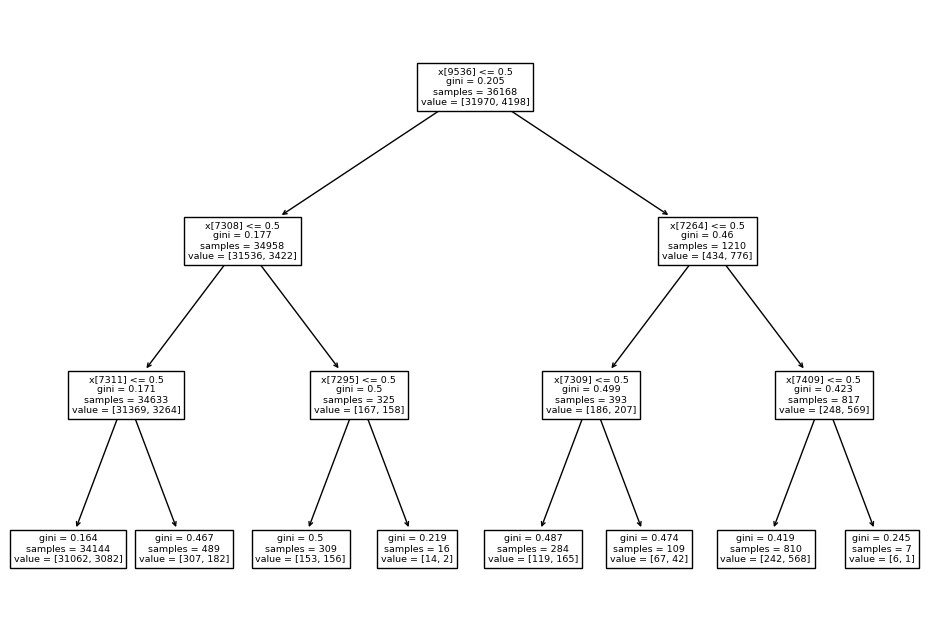

In [98]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train)) 

### <font color='green'>Decision Tree Classifier with criterion entropy</font>
#### Same Steps are repeated for entropy criterion

In [109]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [110]:
y_pred_en = clf_en.predict(X_test)

In [111]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.8910


In [112]:
y_pred_train_en = clf_en.predict(X_train)

y_pred_train_en

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [113]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train_en)))

Training-set accuracy score: 0.8941


In [114]:
print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.8941
Test set score: 0.8910


[Text(0.5, 0.875, 'x[9536] <= 0.5\nentropy = 0.518\nsamples = 36168\nvalue = [31970, 4198]'),
 Text(0.25, 0.625, 'x[7265] <= 0.5\nentropy = 0.462\nsamples = 34958\nvalue = [31536, 3422]'),
 Text(0.125, 0.375, 'x[7301] <= 0.5\nentropy = 0.579\nsamples = 15216\nvalue = [13117, 2099]'),
 Text(0.0625, 0.125, 'entropy = 0.547\nsamples = 14596\nvalue = [12753, 1843]'),
 Text(0.1875, 0.125, 'entropy = 0.978\nsamples = 620\nvalue = [364, 256]'),
 Text(0.375, 0.375, 'x[7311] <= 0.5\nentropy = 0.355\nsamples = 19742\nvalue = [18419, 1323]'),
 Text(0.3125, 0.125, 'entropy = 0.347\nsamples = 19625\nvalue = [18347, 1278]'),
 Text(0.4375, 0.125, 'entropy = 0.961\nsamples = 117\nvalue = [72, 45]'),
 Text(0.75, 0.625, 'x[7264] <= 0.5\nentropy = 0.942\nsamples = 1210\nvalue = [434, 776]'),
 Text(0.625, 0.375, 'x[7309] <= 0.5\nentropy = 0.998\nsamples = 393\nvalue = [186, 207]'),
 Text(0.5625, 0.125, 'entropy = 0.981\nsamples = 284\nvalue = [119, 165]'),
 Text(0.6875, 0.125, 'entropy = 0.962\nsamples = 

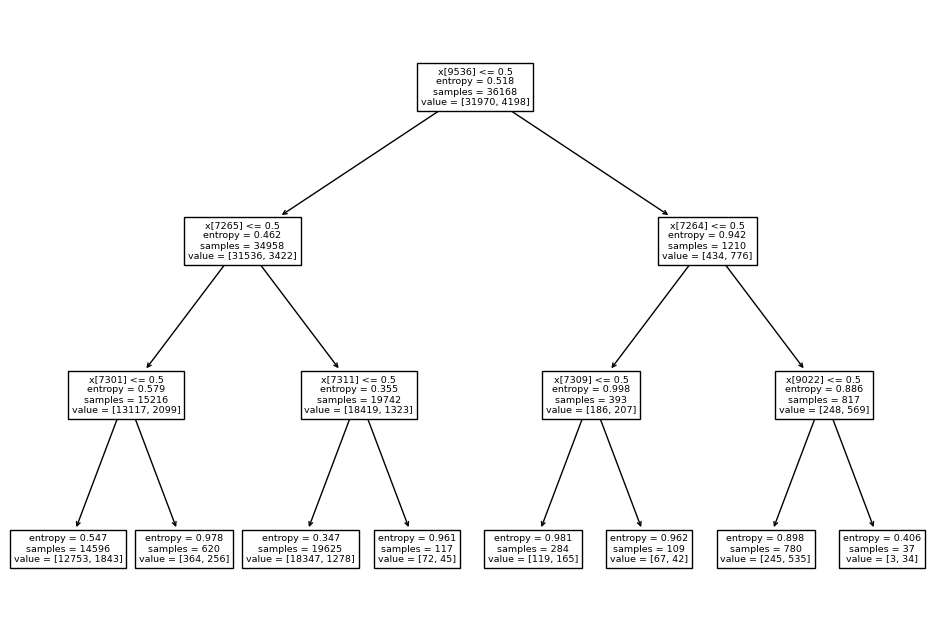

In [115]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train)) 

### <font color='green'>Confusion matrix</font>
#### A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.

In [116]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[7863   89]
 [ 897  194]]


### <font color='green'>Classification Report </font>
#### Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model. 

In [117]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      7952
           1       0.69      0.18      0.28      1091

    accuracy                           0.89      9043
   macro avg       0.79      0.58      0.61      9043
weighted avg       0.87      0.89      0.86      9043



### <font color='green'>Results and Interpretation</font>
#### 1.In this project, I build a Decision-Tree Classifier model to predict the whether a customer will purchase a product or not. I build two models, one with criterion gini index and another one with criterion entropy. The model yields a very good performance as indicated by the model accuracy in both the cases which was found to be 0.89.
#### 2.In the model with criterion gini index, the training-set accuracy score is 0.8943 while the test-set accuracy to be 0.8904. These two values are quite comparable. So, there is no sign of overfitting.
#### 3.Similarly, in the model with criterion entropy, the training-set accuracy score is 0.8941 while the test-set accuracy to be 0.8910.We get the same values as in the case with criterion gini. So, there is no sign of overfitting.
#### 4.In both the cases, the training-set and test-set accuracy score is the same. It may happen because of small dataset.
#### 5.The confusion matrix and classification report yields very good model performance.


## <font color='green'>Thank You For Reading!</font>